# Introduction to Keras

* high-level neural networks API, written in Python and capable of running on top of [TensorFlow](https://github.com/tensorflow/tensorflow), [CNTK](https://github.com/Microsoft/cntk), or [Theano](https://github.com/Theano/Theano)
* Allows easy and fast prototyping
* Runs seamlessly on CPU and GPU
* open source
* Documentation: [https://keras.io/](https://keras.io/)

## installation
First install the backend, for example [TensorFlow](https://www.tensorflow.org/install/).

`$ pip install keras`

## MNIST classification task

The MNIST data set is a database of handwritten digits that is commonly used for training various image processing systems. The goal if this task is to implement a classifier of handwritten digits using neural networks.

![Mnist data set](images/mnist-examples.png)

## Load the data

The data is already shuffled and split to train and test parts.

In [1]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train original shape: {}".format(X_train.shape))
print("y_train original shape: {}".format(y_train.shape))
print("X_test original shape: {}".format(X_test.shape))
print("y_test original shape: {}".format(y_test.shape))

Using TensorFlow backend.


X_train original shape: (60000, 28, 28)
y_train original shape: (60000,)
X_test original shape: (10000, 28, 28)
y_test original shape: (10000,)


Look at one random example.

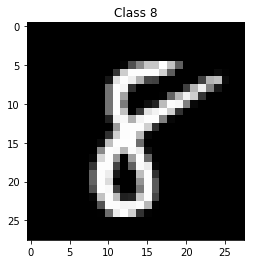

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
i=3495

#print(X_train[i])
plt.imshow(X_train[i], cmap='gray')
plt.title("Class {}".format(y_train[i]))
plt.show()

## Transform the data

We need to scale the input values to have the range (0,1).

In [3]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector.

In [4]:
X_train_flat = X_train.reshape(60000, 784)
X_test_flat = X_test.reshape(10000, 784)
print("X_train matrix shape: {}".format(X_train_flat.shape))
print("X_test matrix shape: {}".format(X_test_flat.shape))

X_train matrix shape: (60000, 784)
X_test matrix shape: (10000, 784)


Transform the targets into one-hot encoding, i.e.
```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
```
etc.

In [5]:
from keras.utils import np_utils

n_classes = 10

print(y_train[49])

y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

print(y_train[49])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


## Architecture of one-layer classifier for MNIST

![Mnist data set](images/one-layer-nn.png)

## Architecture definition

Create a sequential model

In [6]:
from keras.models import Sequential

model = Sequential()

Define its structure.

In [7]:
from keras.layers import Dense, Activation

model.add(Dense(64, input_shape=(784, )))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

Compile the model

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Train the model

In [9]:
model.fit(X_train_flat, y_train,
          batch_size = 128, epochs = 5, verbose=1,
          validation_data=(X_test_flat, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 25us/step - loss: 0.4194 - acc: 0.8864 - val_loss: 0.2286 - val_acc: 0.9349
Epoch 2/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.2028 - acc: 0.9429 - val_loss: 0.1730 - val_acc: 0.9511
Epoch 3/5
60000/60000 [==============================] - 1s 23us/step - loss: 0.1563 - acc: 0.9556 - val_loss: 0.1518 - val_acc: 0.9565
Epoch 4/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.1277 - acc: 0.9638 - val_loss: 0.1245 - val_acc: 0.9637
Epoch 5/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.1082 - acc: 0.9686 - val_loss: 0.1132 - val_acc: 0.9670


## Evaluate the model

First we need to convert probability vectors to class indices.

In [10]:
y_pred = model.predict(X_test_flat)

print(y_pred.shape)

(10000, 10)


In [11]:
import numpy as np

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
print(y_pred_class.shape)

(10000,)


We can use the scikit-learn functions now.

In [12]:
from sklearn import metrics
from sklearn.metrics import accuracy_score


print ("Test accuracy: {:.4f}".format(accuracy_score(y_test_class, y_pred_class)))
print ()
print(metrics.classification_report(y_test_class, y_pred_class, digits=4))

Test accuracy: 0.9670

             precision    recall  f1-score   support

          0     0.9757    0.9837    0.9797       980
          1     0.9851    0.9877    0.9864      1135
          2     0.9624    0.9680    0.9652      1032
          3     0.9653    0.9634    0.9643      1010
          4     0.9780    0.9511    0.9644       982
          5     0.9685    0.9652    0.9669       892
          6     0.9590    0.9770    0.9679       958
          7     0.9630    0.9630    0.9630      1028
          8     0.9644    0.9466    0.9554       974
          9     0.9473    0.9613    0.9543      1009

avg / total     0.9671    0.9670    0.9670     10000



In [13]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_class, y_pred_class))

[[ 964    0    1    1    0    3    8    2    1    0]
 [   0 1121    3    1    0    1    4    0    5    0]
 [   5    1  999    2    2    1    4    9    8    1]
 [   0    0    9  973    0    6    0    7    7    8]
 [   1    0    5    0  934    0    9    4    3   26]
 [   6    0    0    8    2  861    7    2    3    3]
 [   6    3    2    1    2    5  936    1    2    0]
 [   0    5   16    4    0    1    0  990    2   10]
 [   3    1    2   12    7    8    7    6  922    6]
 [   3    7    1    6    8    3    1    7    3  970]]


In [14]:
y_pred = model.predict(X_train_flat)
y_pred_class = np.argmax(y_pred, axis=1)
y_train_class = np.argmax(y_train, axis=1)

print ("Train accuracy: {:.4f}".format(accuracy_score(y_train_class, y_pred_class)))
print ()
print(metrics.classification_report(y_train_class, y_pred_class, digits=4))

Train accuracy: 0.9731

             precision    recall  f1-score   support

          0     0.9893    0.9821    0.9857      5923
          1     0.9773    0.9893    0.9833      6742
          2     0.9651    0.9799    0.9724      5958
          3     0.9838    0.9525    0.9679      6131
          4     0.9788    0.9574    0.9680      5842
          5     0.9723    0.9703    0.9713      5421
          6     0.9708    0.9895    0.9801      5918
          7     0.9748    0.9753    0.9750      6265
          8     0.9706    0.9609    0.9657      5851
          9     0.9481    0.9713    0.9596      5949

avg / total     0.9732    0.9731    0.9731     60000



# Convolutional neural network for MNIST classification

## Reshape the input data

In [15]:
X_train3d = X_train.reshape(60000, 28, 28, 1)
X_test3d = X_test.reshape(10000, 28, 28, 1)

## Architecture definition

Create a sequential model and define its structure.

In [16]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(16, kernel_size=(5, 5), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(32))
model.add(Flatten())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

Compile the model.

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Train the model

In [18]:
model.fit(X_train3d, y_train,
          batch_size = 128, epochs = 5, verbose=1,
          validation_data=(X_test3d, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 25s 420us/step - loss: 0.3467 - acc: 0.8968 - val_loss: 0.1057 - val_acc: 0.9688
Epoch 2/5
60000/60000 [==============================] - 22s 365us/step - loss: 0.1151 - acc: 0.9654 - val_loss: 0.0685 - val_acc: 0.9794
Epoch 3/5
60000/60000 [==============================] - 22s 360us/step - loss: 0.0885 - acc: 0.9732 - val_loss: 0.0578 - val_acc: 0.9830
Epoch 4/5
60000/60000 [==============================] - 22s 366us/step - loss: 0.0754 - acc: 0.9771 - val_loss: 0.0484 - val_acc: 0.9844
Epoch 5/5
60000/60000 [==============================] - 22s 365us/step - loss: 0.0667 - acc: 0.9795 - val_loss: 0.0495 - val_acc: 0.9844


## Evaluate the model

In [19]:
y_pred = model.predict(X_test3d)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [20]:
print ("Test accuracy: {:.4f}".format(accuracy_score(y_test_class, y_pred_class)))
print ()
print(metrics.classification_report(y_test_class, y_pred_class, digits=4))

Test accuracy: 0.9844

             precision    recall  f1-score   support

          0     0.9750    0.9959    0.9854       980
          1     0.9877    0.9938    0.9908      1135
          2     0.9742    0.9884    0.9812      1032
          3     0.9900    0.9842    0.9871      1010
          4     0.9938    0.9817    0.9877       982
          5     0.9736    0.9922    0.9828       892
          6     0.9947    0.9749    0.9847       958
          7     0.9815    0.9786    0.9800      1028
          8     0.9855    0.9784    0.9820       974
          9     0.9880    0.9752    0.9815      1009

avg / total     0.9845    0.9844    0.9844     10000



In [21]:
print(confusion_matrix(y_test_class, y_pred_class))

[[ 976    0    2    0    0    0    0    1    1    0]
 [   0 1128    2    1    1    0    1    1    1    0]
 [   1    3 1020    0    1    0    1    4    2    0]
 [   0    0    3  994    0    6    0    4    3    0]
 [   1    1    2    0  964    0    1    1    2   10]
 [   2    0    0    4    0  885    1    0    0    0]
 [   8    2    0    1    1   11  934    0    1    0]
 [   1    3   13    2    0    1    0 1006    2    0]
 [   8    0    4    1    1    1    1    3  953    2]
 [   4    5    1    1    2    5    0    5    2  984]]


In [22]:
y_pred = model.predict(X_train3d)
y_pred_class = np.argmax(y_pred, axis=1)
y_train_class = np.argmax(y_train, axis=1)

print ("Train accuracy: {:.4f}".format(accuracy_score(y_train_class, y_pred_class)))
print ()
print(metrics.classification_report(y_train_class, y_pred_class, digits=4))

Train accuracy: 0.9863

             precision    recall  f1-score   support

          0     0.9879    0.9965    0.9922      5923
          1     0.9921    0.9911    0.9916      6742
          2     0.9773    0.9899    0.9836      5958
          3     0.9922    0.9770    0.9845      6131
          4     0.9953    0.9800    0.9876      5842
          5     0.9755    0.9915    0.9834      5421
          6     0.9939    0.9885    0.9912      5918
          7     0.9798    0.9895    0.9846      6265
          8     0.9840    0.9805    0.9823      5851
          9     0.9838    0.9780    0.9809      5949

avg / total     0.9863    0.9863    0.9863     60000



## Let's look at some incorrectly classified examples

In [23]:
y_pred = model.predict(X_test3d)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

incorrect_indices = np.nonzero(y_pred_class != y_test_class)[0]
print(incorrect_indices)

[ 259  321  340  445  449  582  659  684  726  740  786  844  938  947
  965 1014 1039 1112 1182 1226 1232 1242 1247 1260 1319 1326 1364 1393
 1414 1500 1530 1709 1717 1754 1878 1901 1982 2016 2018 2043 2053 2107
 2109 2118 2129 2130 2135 2182 2189 2266 2272 2280 2293 2329 2369 2387
 2406 2454 2462 2488 2597 2607 2654 2836 2896 2921 2927 2939 2952 2953
 2979 2995 3005 3030 3060 3073 3384 3422 3503 3520 3550 3558 3559 3597
 3718 3767 3796 3808 3853 3906 4017 4063 4075 4163 4176 4224 4238 4248
 4256 4265 4284 4500 4536 4571 4575 4639 4740 4761 4783 4807 4814 4838
 4860 4874 4956 4966 5067 5068 5246 5642 5734 5749 5887 5888 5955 5973
 6091 6505 6576 6597 6603 6625 6651 6783 7432 7434 7821 8059 8408 8527
 9009 9015 9019 9024 9634 9664 9679 9692 9698 9729 9770 9792 9811 9839
 9892 9905]


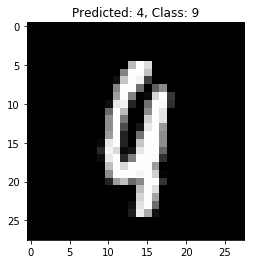

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
i = incorrect_indices[20]

plt.imshow(X_test[i], cmap='gray')
plt.title("Predicted: {}, Class: {}".format(y_pred_class[i], y_test_class[i]))
plt.show()